# Mesothelioma Related Deaths in England (1968-2021)

## The Dataset

In [48]:
import pandas as pd
import numpy as np

# Reading the dataset and storing at variabel meso_deaths
meso_deaths = pd.read_csv('./dataset/Mesothelioma_Deaths_in_England_1968_2021.csv')
display(meso_deaths.head())

,Year,GSS ID,Region,Gender,Mesothelioma Death Recorded
0,1968,E12000001,North East,Male,11
1,1969,E12000001,North East,Male,9
2,1970,E12000001,North East,Male,14
3,1971,E12000001,North East,Male,9
4,1972,E12000001,North East,Male,18


Note: the data in the dataset is already well inserted - thanks to Kaggle -, so there will be no need for dropping null values or treating NaN, for example

In [49]:
# Copying the dataset to X so it can be used without modifying the original one
X = meso_deaths.copy()

# Getting the target into y
y = X.pop('Mesothelioma Death Recorded')

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Separating categorical features from numerical features
features_cat = ['GSS ID', 'Region', 'Gender']
features_num = ['Year']

# Preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# Splitting the data into test and train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=0)

# Using preprocessor
X_train = preprocessor.fit_transform(X_train).toarray()
X_valid = preprocessor.transform(X_valid).toarray()

# Getting the input_shape
input_shape = [X_train.shape[1]]
print(X_train.shape)

(453, 21)


## The Model

#### Making a linear model and plotting its results

Minimum Validation Loss: 44.0043


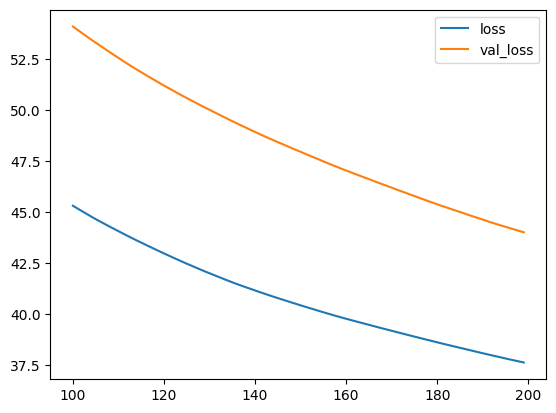

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating the model
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])

# Compiling the model - adam algorithm for optimizer and mae (mean absolute error) for loss value
model.compile(
    optimizer='adam',
    loss='mae',
)

# fitting the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=200,
    verbose=0
)

# Creating a DataFrame with history so it can be plottable
history_df = pd.DataFrame(history.history) # the model saves the history into history

# Plots the graph for loss and validation loss
history_df.loc[100:, ['loss', 'val_loss']].plot()

# Prints the minimuim achieved for validation loss so the analyses of underfitting or overfitting can be done
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

The curves are with a big gap between them and the loss validation curve is above the loss curve. It can be a symptom of overfitting, so let's try with more capacity - e.g adding more layers to the model.

Epoch 1/50
227/227 [==============================] - 2s 5ms/step - loss: 53.6755 - val_loss: 35.8181
Epoch 2/50
227/227 [==============================] - 1s 4ms/step - loss: 22.6590 - val_loss: 19.2412
Epoch 3/50
227/227 [==============================] - 1s 4ms/step - loss: 15.7538 - val_loss: 16.0115
Epoch 4/50
227/227 [==============================] - 1s 3ms/step - loss: 13.3692 - val_loss: 14.3132
Epoch 5/50
227/227 [==============================] - 1s 3ms/step - loss: 12.0439 - val_loss: 13.4454
Epoch 6/50
227/227 [==============================] - 1s 3ms/step - loss: 11.0552 - val_loss: 12.5258
Epoch 7/50
227/227 [==============================] - 1s 4ms/step - loss: 10.3643 - val_loss: 11.5348
Epoch 8/50
227/227 [==============================] - 1s 3ms/step - loss: 9.6158 - val_loss: 11.1186
Epoch 9/50
227/227 [==============================] - 1s 5ms/step - loss: 9.5686 - val_loss: 11.8150
Epoch 10/50
227/227 [==============================] - 1s 3ms/step - loss: 8.9785 - 

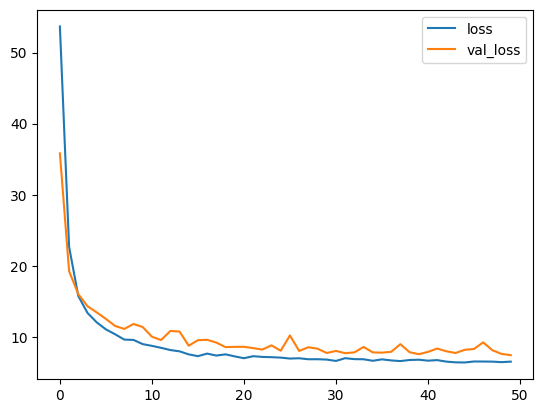

In [60]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2,
    epochs=50
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Validtaion Loss: {:0.4f}'.format(history_df['val_loss'].min()))

Turns out that the model did pretty well with this setup, the validation loss curve maintains itself above the loss curve, and pretty close. I good thing to implement here would be an Early Stopping. 